<a href="https://colab.research.google.com/github/DDPSscipo/Civica_Netzero/blob/main/Descriptive_Analysis_Guardian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
guardian_art = pd.read_csv("/content/guardian_articles - guardian_articles (1).csv")
guardian_art.head()

,id,type,sectionId,sectionName,webPublicationDate,webUrl,apiUrl,isHosted,pillarId,pillarName
0,commentisfree/2021/sep/01/oil-producing-countr...,article,commentisfree,Opinion,2021-09-01,https://www.theguardian.com/commentisfree/2021...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion
1,environment/2021/sep/02/uks-top-climate-scient...,article,environment,Environment,2021-09-02,https://www.theguardian.com/environment/2021/s...,https://content.guardianapis.com/environment/2...,False,pillar/news,News
2,environment/2021/sep/22/former-nationals-leade...,article,environment,Environment,2021-09-21,https://www.theguardian.com/environment/2021/s...,https://content.guardianapis.com/environment/2...,False,pillar/news,News
3,commentisfree/2021/sep/28/net-zero-is-not-the-...,article,commentisfree,Opinion,2021-09-27,https://www.theguardian.com/commentisfree/2021...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion
4,commentisfree/2021/oct/14/net-zero-fossil-free...,article,commentisfree,Opinion,2021-10-14,https://www.theguardian.com/commentisfree/2021...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion


In [ ]:
from datetime import datetime

date_string = '2021-01-01'
date_object = datetime.strptime(date_string, '%Y-%m-%d')
guardian_date = guardian_art['webPublicationDate']



In [ ]:
guardian_art['webPublicationDate'] = pd.to_datetime(guardian_art['webPublicationDate'])

tot_art = guardian_art.groupby('webPublicationDate').size()
print(tot_art)

webPublicationDate
2021-09-01 00:00:00+00:00    1
2021-09-02 00:00:00+00:00    1
2021-09-21 00:00:00+00:00    1
2021-09-27 00:00:00+00:00    1
2021-10-14 00:00:00+00:00    1
                            ..
2023-11-29 00:00:00+00:00    1
2024-01-07 00:00:00+00:00    1
2024-02-20 00:00:00+00:00    1
2024-02-25 00:00:00+00:00    1
2024-02-27 00:00:00+00:00    1
Length: 124, dtype: int64


In [ ]:
max_tot_art = tot_art.max()
print("maximum number of articles", max_tot_art)

maximum number of articles 8


In [ ]:
max_tot_art = tot_art.idxmax()
print("Date with max number of articles", max_tot_art)

Date with max number of articles 2023-09-20 00:00:00+00:00


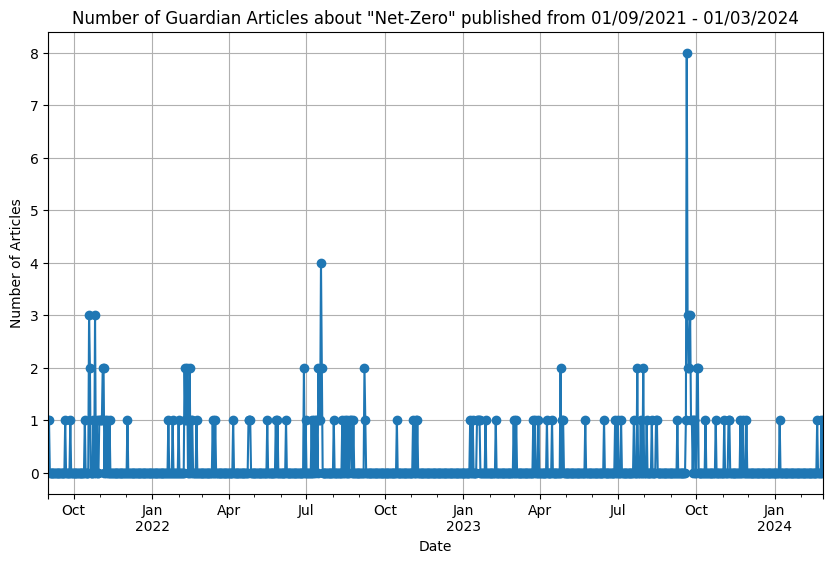

In [ ]:
guardian_art['webPublicationDate'] = pd.to_datetime(guardian_art['webPublicationDate'], format='ISO8601', utc=True)
tot_art = guardian_art.groupby(pd.Grouper(key='webPublicationDate', freq='D')).size()

plt.figure(figsize=(10,6))
tot_art.plot(kind='line', marker='o', linestyle='-')
plt.title('Number of Guardian Articles about "Net-Zero" published from 01/09/2021 - 01/03/2024')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

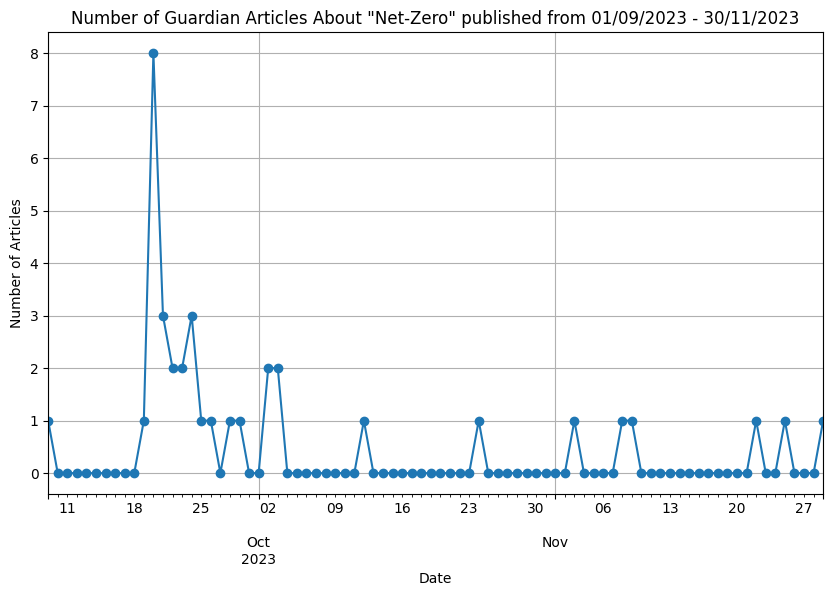

In [ ]:
guardian_art['webPublicationDate'] = pd.to_datetime(guardian_art['webPublicationDate'], utc=True)
filter_tot_art = guardian_art[(guardian_art['webPublicationDate'] >= '2023-09-01') & (guardian_art['webPublicationDate'] <= '2023-11-30')]

tot_art = filter_tot_art.groupby(pd.Grouper(key='webPublicationDate', freq='D')).size()

plt.figure(figsize=(10,6))
tot_art.plot(kind='line', marker='o', linestyle='-')
plt.title('Number of Guardian Articles About "Net-Zero" published from 01/09/2023 - 30/11/2023')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()



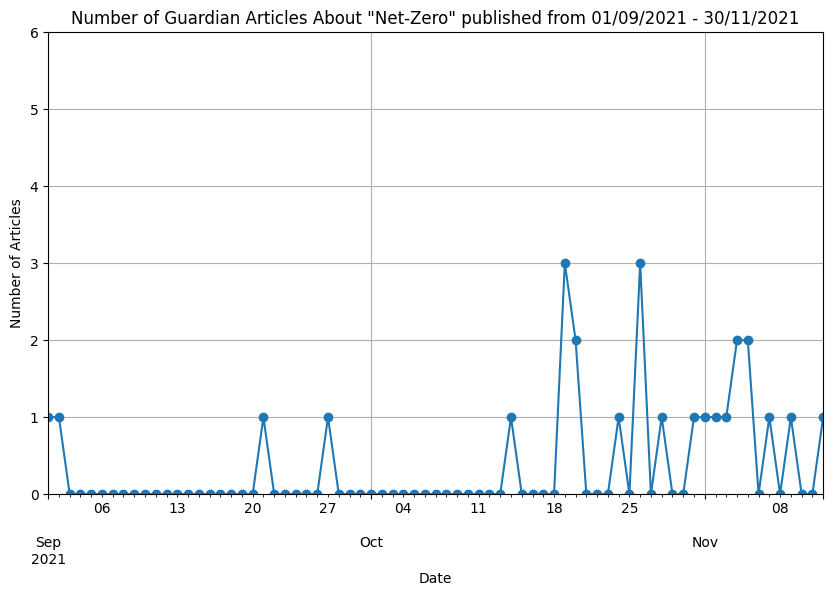

In [ ]:
guardian_art['webPublicationDate'] = pd.to_datetime(guardian_art['webPublicationDate'], utc=True)
filter_tot_art = guardian_art[(guardian_art['webPublicationDate'] >= '2021-09-01') & (guardian_art['webPublicationDate'] <= '2021-11-30')]

tot_art = filter_tot_art.groupby(pd.Grouper(key='webPublicationDate', freq='D')).size()

plt.figure(figsize=(10,6))
tot_art.plot(kind='line', marker='o', linestyle='-')

plt.ylim(0, tot_art.max() * 2)
plt.title('Number of Guardian Articles About "Net-Zero" published from 01/09/2021 - 30/11/2021')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()



In [ ]:
summary_guardian_art = guardian_art['webPublicationDate'].describe()
print(summary_guardian_art)



count                     156
unique                    124
top       2023-09-20 00:00:00
freq                        8
Name: webPublicationDate, dtype: object


In [ ]:
#Extraction of the Guardian Headline from the URL links
import pandas as pd
from bs4 import BeautifulSoup
import requests

def extract_title(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        title = soup.find('title').text
        return title
    except Exception as e:
        print(f"Error extracting title from {url}: {e}")
        return None

# Apply the function to each URL and create a new column with titles
guardian_art['Title'] = guardian_art['webUrl'].apply(extract_title)

# Save the updated DataFrame with titles to a new CSV file
guardian_art.to_csv("/content/guardian_articles_with_titles.csv", index=False)

In [ ]:
guardian_art_title = pd.read_csv("/content/guardian_articles_with_titles.csv")
guardian_art_title.head(100)


,id,type,sectionId,sectionName,webPublicationDate,webUrl,apiUrl,isHosted,pillarId,pillarName,Title
0,commentisfree/2021/sep/01/oil-producing-countr...,article,commentisfree,Opinion,2021-09-01 00:00:00+00:00,https://www.theguardian.com/commentisfree/2021...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion,"Without help for oil-producing countries, net ..."
1,environment/2021/sep/02/uks-top-climate-scient...,article,environment,Environment,2021-09-02 00:00:00+00:00,https://www.theguardian.com/environment/2021/s...,https://content.guardianapis.com/environment/2...,False,pillar/news,News,UK’s top climate adviser says criticism of net...
2,environment/2021/sep/22/former-nationals-leade...,article,environment,Environment,2021-09-21 00:00:00+00:00,https://www.theguardian.com/environment/2021/s...,https://content.guardianapis.com/environment/2...,False,pillar/news,News,Former Nationals leader Michael McCormack warn...
3,commentisfree/2021/sep/28/net-zero-is-not-the-...,article,commentisfree,Opinion,2021-09-27 00:00:00+00:00,https://www.theguardian.com/commentisfree/2021...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion,Net zero is not the real issue: we need to foc...
4,commentisfree/2021/oct/14/net-zero-fossil-free...,article,commentisfree,Opinion,2021-10-14 00:00:00+00:00,https://www.theguardian.com/commentisfree/2021...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion,Forget net zero – let’s have a ‘fossil freedom...
...,...,...,...,...,...,...,...,...,...,...,...
95,books/2023/apr/09/five-times-faster-by-simon-s...,article,books,Books,2023-04-09 12:00:50+00:00,https://www.theguardian.com/books/2023/apr/09/...,https://content.guardianapis.com/books/2023/ap...,False,pillar/arts,Arts,Five Times Faster by Simon Sharpe review – a r...
96,uk-news/2023/apr/15/northern-ireland-governmen...,article,uk-news,UK news,2023-04-15 00:00:00+00:00,https://www.theguardian.com/uk-news/2023/apr/1...,https://content.guardianapis.com/uk-news/2023/...,False,pillar/news,News,Lack of NI government puts net zero targets at...
97,commentisfree/2023/apr/25/tory-mp-net-zero-ros...,article,commentisfree,Opinion,2023-04-25 00:00:00+00:00,https://www.theguardian.com/commentisfree/2023...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion,"I’m a Tory MP, but I can’t let ministers trash..."
98,environment/2023/apr/25/tory-former-net-zero-t...,article,environment,Environment,2023-04-25 00:00:00+00:00,https://www.theguardian.com/environment/2023/a...,https://content.guardianapis.com/environment/2...,False,pillar/news,News,Tory former net zero tsar calls for halt to Ro...


In [ ]:
#Sentiment Analysis
import nltk
nltk.download('vader_lexicon')

plt.style.use('ggplot')

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

SIA = SentimentIntensityAnalyzer()

guardian_art_title['Sentiment_Scores'] = guardian_art_title['Title'].apply(lambda x: SIA.polarity_scores(x))

guardian_art_title['Positive_Score'] = guardian_art_title['Sentiment_Scores'].apply(lambda x: x['pos'])
guardian_art_title['Negative_Score'] = guardian_art_title['Sentiment_Scores'].apply(lambda x: x['neg'])
guardian_art_title['Compound_Score'] = guardian_art_title['Sentiment_Scores'].apply(lambda x: x['compound'])

guardian_art_title.head(150)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,id,type,sectionId,sectionName,webPublicationDate,webUrl,apiUrl,isHosted,pillarId,pillarName,Title,Sentiment_Scores,Positive_Score,Negative_Score,Compound_Score
0,commentisfree/2021/sep/01/oil-producing-countr...,article,commentisfree,Opinion,2021-09-01 00:00:00+00:00,https://www.theguardian.com/commentisfree/2021...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion,"Without help for oil-producing countries, net ...","{'neg': 0.106, 'neu': 0.8, 'pos': 0.094, 'comp...",0.094,0.106,-0.0665
1,environment/2021/sep/02/uks-top-climate-scient...,article,environment,Environment,2021-09-02 00:00:00+00:00,https://www.theguardian.com/environment/2021/s...,https://content.guardianapis.com/environment/2...,False,pillar/news,News,UK’s top climate adviser says criticism of net...,"{'neg': 0.321, 'neu': 0.596, 'pos': 0.083, 'co...",0.083,0.321,-0.7351
2,environment/2021/sep/22/former-nationals-leade...,article,environment,Environment,2021-09-21 00:00:00+00:00,https://www.theguardian.com/environment/2021/s...,https://content.guardianapis.com/environment/2...,False,pillar/news,News,Former Nationals leader Michael McCormack warn...,"{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'comp...",0.000,0.351,-0.7964
3,commentisfree/2021/sep/28/net-zero-is-not-the-...,article,commentisfree,Opinion,2021-09-27 00:00:00+00:00,https://www.theguardian.com/commentisfree/2021...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion,Net zero is not the real issue: we need to foc...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0000
4,commentisfree/2021/oct/14/net-zero-fossil-free...,article,commentisfree,Opinion,2021-10-14 00:00:00+00:00,https://www.theguardian.com/commentisfree/2021...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion,Forget net zero – let’s have a ‘fossil freedom...,"{'neg': 0.118, 'neu': 0.621, 'pos': 0.261, 'co...",0.261,0.118,0.5106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,business/2023/oct/24/sunak-faces-further-press...,article,business,Business,2023-10-24 00:00:00+00:00,https://www.theguardian.com/business/2023/oct/...,https://content.guardianapis.com/business/2023...,False,pillar/news,News,Sunak faces further pressure over net zero U-t...,"{'neg': 0.246, 'neu': 0.642, 'pos': 0.112, 'co...",0.112,0.246,-0.3612
146,environment/2023/nov/03/un-to-seek-assurances-...,article,environment,Environment,2023-11-03 00:00:00+00:00,https://www.theguardian.com/environment/2023/n...,https://content.guardianapis.com/environment/2...,False,pillar/news,News,UN to seek assurances UK will not renege on ne...,"{'neg': 0.2, 'neu': 0.683, 'pos': 0.117, 'comp...",0.117,0.200,-0.4019
147,environment/2023/nov/08/oil-and-gas-not-the-pr...,article,environment,Environment,2023-11-08 00:00:00+00:00,https://www.theguardian.com/environment/2023/n...,https://content.guardianapis.com/environment/2...,False,pillar/news,News,"Oil and gas ‘not the problem’ for climate, say...","{'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'comp...",0.000,0.204,-0.6249
148,lifeandstyle/2023/nov/09/dining-across-the-div...,article,lifeandstyle,Life and style,2023-11-09 12:30:04+00:00,https://www.theguardian.com/lifeandstyle/2023/...,https://content.guardianapis.com/lifeandstyle/...,False,pillar/lifestyle,Lifestyle,Dining across the divide: ‘I’d move heaven and...,"{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...",0.136,0.000,0.5106


In [ ]:
most_negative_article = guardian_art_title.sort_values(by='Compound_Score').iloc[0]
print("Most Negatively Scored Article:")
print(most_negative_article['Title'])
print("Negative Score:", most_negative_article['Negative_Score'])
print("Positive Score:", most_negative_article['Positive_Score'])
print("Compound Score:", most_negative_article['Compound_Score'])


Most Negatively Scored Article:
Slow route to net zero will worsen global climate crisis, IPCC chief warns | Climate crisis | The Guardian
Negative Score: 0.498
Positive Score: 0.0
Compound Score: -0.9169


In [ ]:
most_positive_article = guardian_art_title.sort_values(by='Compound_Score', ascending=False).iloc[0]
print("Most Positively Scored Article:")
print(most_positive_article['Title'])
print("Positive Score:", most_positive_article['Positive_Score'])
print("Negative Score:", most_positive_article['Negative_Score'])
print("Compound Score:", most_positive_article['Compound_Score'])


Most Positively Scored Article:
The great hydrogen gamble: hot air or net zero’s holy grail? | Energy industry | The Guardian
Positive Score: 0.323
Negative Score: 0.0
Compound Score: 0.7351


In [ ]:
# Convert string dates to datetime objects
guardian_art_title['webPublicationDate'] = pd.to_datetime(guardian_art_title['webPublicationDate'])

# Filter for the specified time range
filtered_articles = guardian_art_title[(guardian_art_title['webPublicationDate'] >= '2021-09-01') & (guardian_art_title['webPublicationDate'] <= '2021-11-30')]

# Display sentiment scores of filtered articles
print("Sentiment Scores of Articles from 01-09-2021 to 30-11-2021:")
print(filtered_articles[['Title', 'Positive_Score', 'Negative_Score', 'Compound_Score']])


Sentiment Scores of Articles from 01-09-2021 to 30-11-2021:
                                                Title  Positive_Score  \
0   Without help for oil-producing countries, net ...           0.094   
1   UK’s top climate adviser says criticism of net...           0.083   
2   Former Nationals leader Michael McCormack warn...           0.000   
3   Net zero is not the real issue: we need to foc...           0.000   
4   Forget net zero – let’s have a ‘fossil freedom...           0.261   
5   UK politics: net zero strategy to support 440,...           0.124   
6   UK’s net zero strategy has a glaring omission:...           0.000   
7   It’s Tory rebels, not Boris Johnson, who will ...           0.000   
8   The UK’s net zero strategy still avoids what i...           0.000   
9   Net zero strategy: Tory MPs’ anger over Treasu...           0.097   
10  All hail the net zero strategy: a year late an...           0.067   
11  Net zero diaries: three people on the climate ...           

In [ ]:
# Sentiment analysis of articles published between 01/09/2021 - 30/11/2021
guardian_art_title['webPublicationDate'] = pd.to_datetime(guardian_art_title['webPublicationDate'])

# Filter for the specified time range
filtered_articles = guardian_art_title[(guardian_art_title['webPublicationDate'] >= '2021-09-01') & (guardian_art_title['webPublicationDate'] <= '2021-11-30')]

# Calculate sentiment counts
positive_count = filtered_articles[filtered_articles['Compound_Score'] > 0].shape[0]
negative_count = filtered_articles[filtered_articles['Compound_Score'] < 0].shape[0]
neutral_count = filtered_articles[filtered_articles['Compound_Score'] == 0].shape[0]

# Display sentiment counts
print("Number of Articles with Positive Sentiment:", positive_count)
print("Number of Articles with Negative Sentiment:", negative_count)
print("Number of Articles with Neutral Sentiment:", neutral_count)


Number of Articles with Positive Sentiment: 8
Number of Articles with Negative Sentiment: 13
Number of Articles with Neutral Sentiment: 5


In [ ]:
# Most Negative Article
guardian_art_title['webPublicationDate'] = pd.to_datetime(guardian_art_title['webPublicationDate'])

# Filter for the specified time range
filtered_articles = guardian_art_title[(guardian_art_title['webPublicationDate'] >= '2021-09-01') & (guardian_art_title['webPublicationDate'] <= '2021-11-30')]

# Sort the filtered DataFrame based on Compound_Score in ascending order to get the most negative article
most_negative_article = filtered_articles.sort_values(by='Compound_Score').iloc[0]

# Display the most negative article
print("Most Negative Article Title:")
print(most_negative_article['Title'])
print("Negative Score:", most_negative_article['Negative_Score'])
print("Positive Score:", most_negative_article['Positive_Score'])
print("Compound Score:", most_negative_article['Compound_Score'])


Most Negative Article Title:
Net zero diaries: three people on the climate crisis and the UK’s response | Climate crisis | The Guardian
Negative Score: 0.353
Positive Score: 0.0
Compound Score: -0.8481


In [ ]:
# Most Positive Article
guardian_art_title['webPublicationDate'] = pd.to_datetime(guardian_art_title['webPublicationDate'])

# Filter for the specified time range
filtered_articles = guardian_art_title[(guardian_art_title['webPublicationDate'] >= '2021-09-01') & (guardian_art_title['webPublicationDate'] <= '2021-11-30')]

# Sort the filtered DataFrame based on Compound_Score in descending order to get the most positive article
most_positive_article = filtered_articles.sort_values(by='Compound_Score', ascending=False).iloc[0]

# Display the most positive article
print("Most Positive Article Title:")
print(most_positive_article['Title'])
print("Positive Score:", most_positive_article['Positive_Score'])
print("Negative Score:", most_positive_article['Negative_Score'])
print("Compound Score:", most_positive_article['Compound_Score'])


Most Positive Article Title:
Forget net zero – let’s have a ‘fossil freedom day’ | Mark Lynas | The Guardian
Positive Score: 0.261
Negative Score: 0.118
Compound Score: 0.5106


In [ ]:
# Sentiment Analysis of articles from 01/09/2023 - 30/11/2023
guardian_art_title['webPublicationDate'] = pd.to_datetime(guardian_art_title['webPublicationDate'])

# Filter for the specified time range
filtered_articles = guardian_art_title[(guardian_art_title['webPublicationDate'] >= '2023-09-01') & (guardian_art_title['webPublicationDate'] <= '2023-11-30')]

# Calculate sentiment counts
positive_count = filtered_articles[filtered_articles['Compound_Score'] > 0].shape[0]
negative_count = filtered_articles[filtered_articles['Compound_Score'] < 0].shape[0]
neutral_count = filtered_articles[filtered_articles['Compound_Score'] == 0].shape[0]

# Display sentiment counts
print("Number of Articles with Positive Sentiment:", positive_count)
print("Number of Articles with Negative Sentiment:", negative_count)
print("Number of Articles with Neutral Sentiment:", neutral_count)


Number of Articles with Positive Sentiment: 7
Number of Articles with Negative Sentiment: 19
Number of Articles with Neutral Sentiment: 10


In [ ]:
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to categorize sentiment scores
guardian_art_title['Sentiment_Category'] = guardian_art_title['Sentiment_Scores'].apply(lambda x: categorize_sentiment(x['compound']))

# Count the number of articles in each sentiment category
sentiment_counts = guardian_art_title['Sentiment_Category'].value_counts()

# Create a table with the number of positive, negative, and neutral articles
sentiment_table = pd.DataFrame({
    'Sentiment': sentiment_counts.index,
    'Number of Articles': sentiment_counts.values
})

# Display the table
print(sentiment_table)

  Sentiment  Number of Articles
0  Negative                  79
1  Positive                  39
2   Neutral                  38


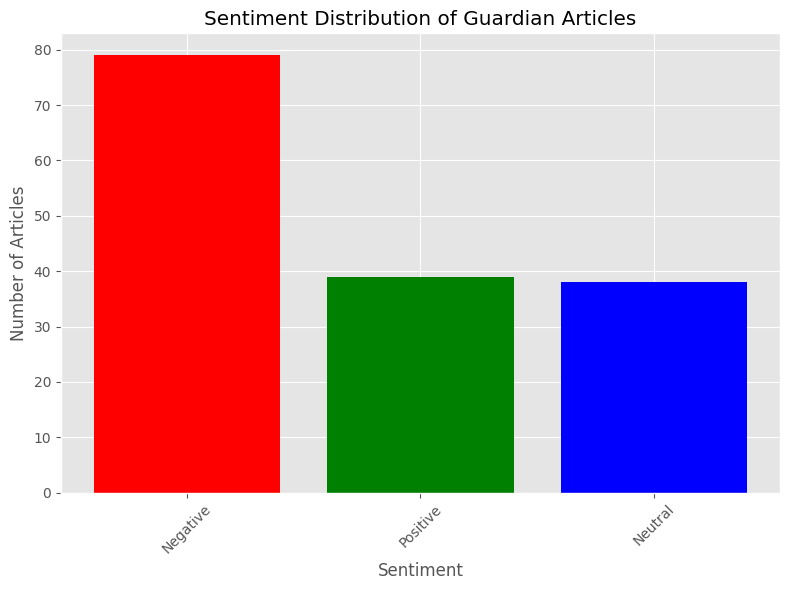

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(sentiment_table['Sentiment'], sentiment_table['Number of Articles'], color=['red', 'green', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.title('Sentiment Distribution of Guardian Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
twitter_2021 = pd.read_csv("/content/Twitter Date civica - data_2021.csv")
twitter_2021.head()

,tweet_id,views_count,favorite_count,retweet_count,full_text,date,date-time\n,hashtags,user_id,user_followers_count,user_location,user_screen_name
0,1.443176e+18,NaN,20,12,Congratulations @DraxGroup for your outstandin...,9/29/2021,Wed Sep 29 11:29:57 +0000 2021,[],VXNlcjo0MjA2NTc4MTg=,1280,"Bristol, UK",BrisRisingTide
1,1.443175e+18,NaN,4,1,UK trade association for manufacturers and pro...,9/29/2021,Wed Sep 29 11:26:38 +0000 2021,[],VXNlcjoxODE5ODE5Nzg=,18455,NaN,ElectricalTimes
2,1.443171e+18,NaN,1,0,A new National #Electrification #Skills Framew...,9/29/2021,Wed Sep 29 11:08:03 +0000 2021,"['Electrification', 'Skills', 'LCV2021', 'EVs'...",VXNlcjoxMjg2MTM0OTUw,9678,United Kingdom,HVM_Catapult
3,1.443170e+18,NaN,5,1,Every Australian state and territory has commi...,9/29/2021,Wed Sep 29 11:05:40 +0000 2021,[],VXNlcjozMzE5OTg2OQ==,3019,"London, England",angeladewan
4,1.443168e+18,NaN,5,2,The UK has achieved a major technology breakth...,9/29/2021,Wed Sep 29 10:57:45 +0000 2021,"['cement', 'netzero', 'hydrogen']",VXNlcjo5MDM4NTY1OTA=,5968,UK,MineralProduct


In [ ]:
from datetime import datetime

date_string = '2022-01-01'
date_object = datetime.strptime(date_string, '%Y-%m-%d')

dates_2021 = twitter_2021['date']

In [ ]:
twitter_2021['date'] = pd.to_datetime(twitter_2021['date'])

tweet_counts_2021 = twitter_2021.groupby('date').size()

print(tweet_counts_2021)

date
2021-09-01    53
2021-09-02    51
2021-09-03    58
2021-09-04    12
2021-09-05    14
              ..
2021-11-26    54
2021-11-27     8
2021-11-28    20
2021-11-29    43
2024-04-12    18
Length: 89, dtype: int64


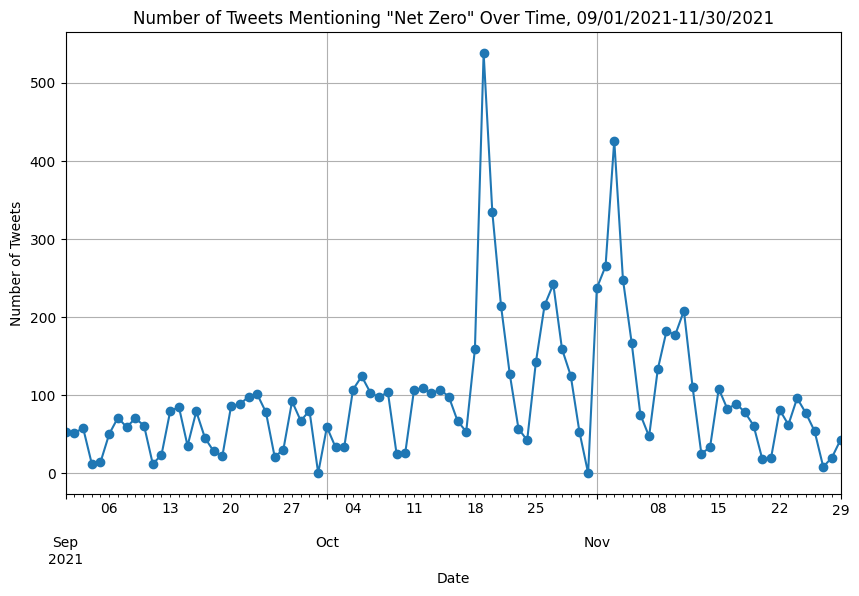

In [ ]:
# creating 2021 graph
twitter_2021['date'] = pd.to_datetime(twitter_2021['date'])
filtered_tweets_2021 = twitter_2021[(twitter_2021['date'] >= '2021-09-01') & (twitter_2021['date'] <= '2021-11-30')]
tweet_counts_2021 = filtered_tweets_2021.groupby(pd.Grouper(key='date', freq='D')).size()

plt.figure(figsize=(10, 6))
tweet_counts_2021.plot(kind='line', marker='o', linestyle='-')
plt.title('Number of Tweets Mentioning "Net Zero" Over Time, 09/01/2021-11/30/2021')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

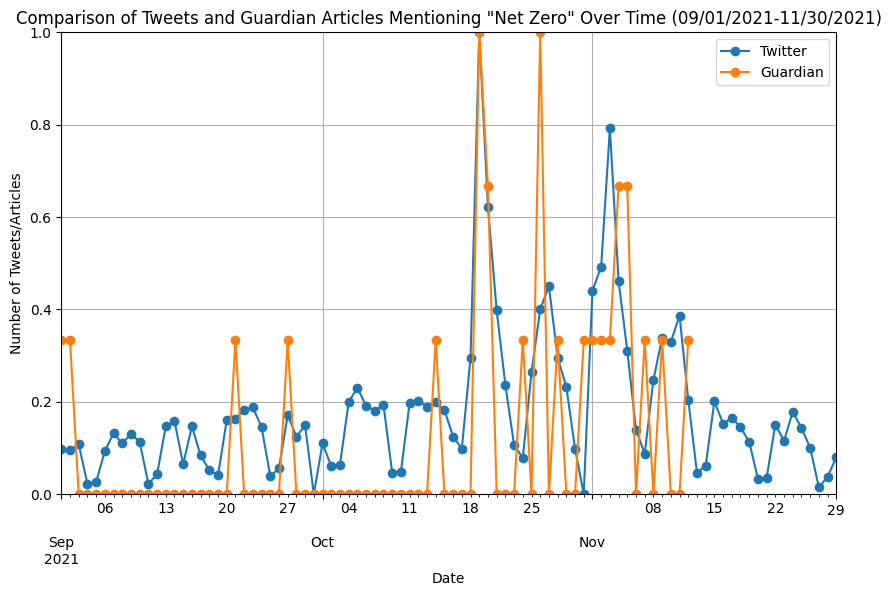

In [ ]:
# Comparative descriptive Analysis for Twitter and Guardian between 01/09/2021 - 30/11/2021


# Normalize Twitter and Guardian data
normalized_tweet_counts_2021 = (tweet_counts_2021 - tweet_counts_2021.min()) / (tweet_counts_2021.max() - tweet_counts_2021.min())
normalized_tot_art = (tot_art - tot_art.min()) / (tot_art.max() - tot_art.min())

# Plot Twitter data
plt.figure(figsize=(10, 6))
normalized_tweet_counts_2021.plot(kind='line', marker='o', linestyle='-', label='Twitter')

# Plot Guardian data
normalized_tot_art.plot(kind='line', marker='o', linestyle='-', label='Guardian')

# Set y-axis limit for better visualization
plt.ylim(0, 1)

# Add title and labels
plt.title('Comparison of Tweets and Guardian Articles Mentioning "Net Zero" Over Time (09/01/2021-11/30/2021)')
plt.xlabel('Date')
plt.ylabel('Number of Tweets/Articles')
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
twitter_2023 = pd.read_csv("/content/Twitter_civica_2023 - data_2023.csv")
twitter_2023.head()

,tweet_id,views_count,favorite_count,retweet_count,full_text,date,date-time,hashtags,user_id,user_followers_count,user_location,user_screen_name
0,1.707777e+18,42,1,0,How a thinktank got the cost of net zero for t...,9/29/2023,Fri Sep 29 15:17:44 +0000 2023,[],VXNlcjo5MjkzNjI5Mzg3MzcwNjU5ODU=,4927,HP224hd,SteveChappell9
1,1.707776e+18,50,1,0,@LouHaigh Ocean Prime is disrupting the global...,9/29/2023,Fri Sep 29 15:14:11 +0000 2023,[],VXNlcjoxNjU1MjM3OTQwMDk0NjgxMDkz,822,"London, but happy to travel",Oceanprime_Dave
2,1.707774e+18,6,2,0,@NagwanYYC Odd how the UK put a pause on 2035 ...,9/29/2023,Fri Sep 29 15:06:32 +0000 2023,[],VXNlcjoxMDIxMzgxODA3MDgwNjk3ODU3,75,"Lethbridge, Alberta",GeorgeRigaux
3,1.707770e+18,194,3,1,In the news this week. Gordon MP @RThomsonMP o...,9/29/2023,Fri Sep 29 14:51:22 +0000 2023,[],VXNlcjoxNTA0MjAyOTE1ODM3MzE3MTI3,258,Aberdeenshire,snpshiregroup
4,1.707769e+18,818,43,9,"@horton_official @JohnJCrace Not ""think tank"" ...",9/29/2023,Fri Sep 29 14:49:11 +0000 2023,[],VXNlcjoxMzU5MDQxMjc=,102,"Leyton, London",stu_m70


In [ ]:
from datetime import datetime

date_string = '2022-01-01'
date_object = datetime.strptime(date_string, '%Y-%m-%d')

dates_2023 = twitter_2023['date']

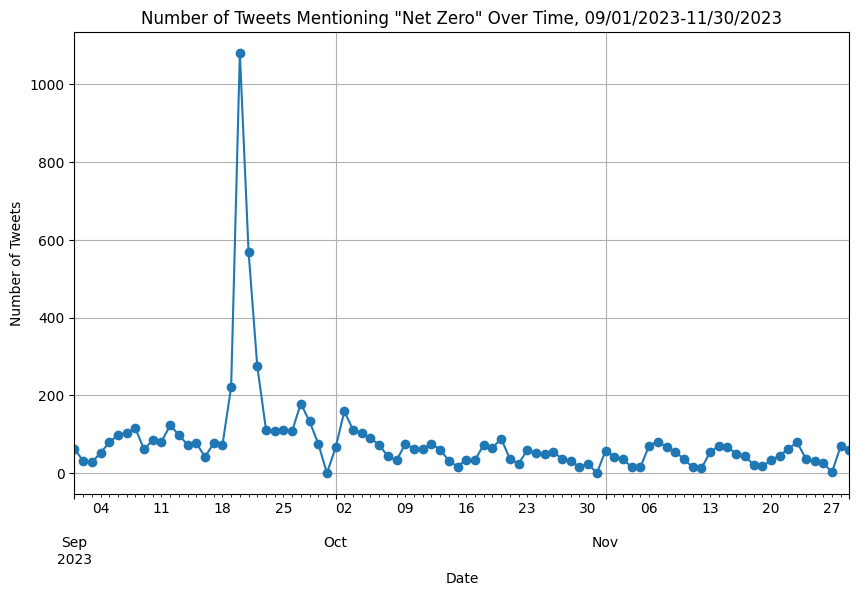

In [ ]:
# 2023
twitter_2023['date'] = pd.to_datetime(twitter_2023['date'])
filtered_tweets_2023 = twitter_2023[(twitter_2023['date'] >= '2023-09-01') & (twitter_2023['date'] <= '2023-11-30')]
tweet_counts_2023 = filtered_tweets_2023.groupby(pd.Grouper(key='date', freq='D')).size()

plt.figure(figsize=(10, 6))
tweet_counts_2023.plot(kind='line', marker='o', linestyle='-')
plt.title('Number of Tweets Mentioning "Net Zero" Over Time, 09/01/2023-11/30/2023')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

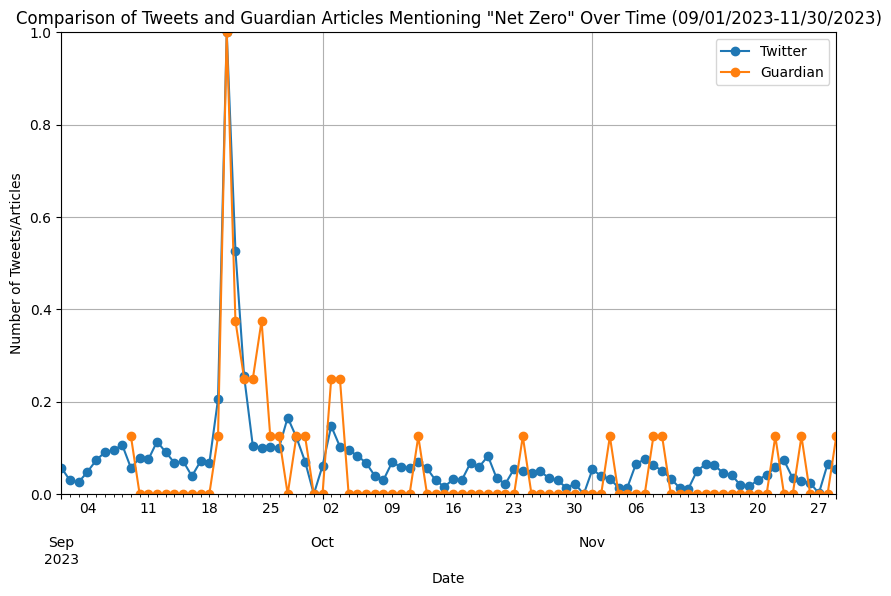

In [ ]:
# Comparative descriptive Analysis for Twitter and Guardian between 01/09/2023 - 30/11/2023


# Twitter data for 2023
twitter_2023['date'] = pd.to_datetime(twitter_2023['date'])
filtered_tweets_2023 = twitter_2023[(twitter_2023['date'] >= '2023-09-01') & (twitter_2023['date'] <= '2023-11-30')]
tweet_counts_2023 = filtered_tweets_2023.groupby(pd.Grouper(key='date', freq='D')).size()

# Guardian data for 2023
guardian_art['webPublicationDate'] = pd.to_datetime(guardian_art['webPublicationDate'],format='ISO8601', utc=True)
filter_tot_art_2023 = guardian_art[(guardian_art['webPublicationDate'] >= '2023-09-01') & (guardian_art['webPublicationDate'] <= '2023-11-30')]
tot_art_2023 = filter_tot_art_2023.groupby(pd.Grouper(key='webPublicationDate', freq='D')).size()

# Normalize Twitter and Guardian data for 2023
normalized_tweet_counts_2023 = (tweet_counts_2023 - tweet_counts_2023.min()) / (tweet_counts_2023.max() - tweet_counts_2023.min())
normalized_tot_art_2023 = (tot_art_2023 - tot_art_2023.min()) / (tot_art_2023.max() - tot_art_2023.min())

# Plot Twitter data
plt.figure(figsize=(10, 6))
normalized_tweet_counts_2023.plot(kind='line', marker='o', linestyle='-', label='Twitter')

# Plot Guardian data
normalized_tot_art_2023.plot(kind='line', marker='o', linestyle='-', label='Guardian')

# Set y-axis limit for better visualization
plt.ylim(0, 1)

# Add title and labels
plt.title('Comparison of Tweets and Guardian Articles Mentioning "Net Zero" Over Time (09/01/2023-11/30/2023)')
plt.xlabel('Date')
plt.ylabel('Number of Tweets/Articles')
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()
